In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#TableOne for Summary Tables
import tableone
#Visualize all Columns
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None

#Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


import plotclassification 

#FEATURE SELECTION
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from feature_engine.selection import DropDuplicateFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from ReliefF import ReliefF
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import SequentialFeatureSelector

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import RocCurveDisplay

# Import stats models
import statsmodels.api as sm
import math

#Neural Netwoks
from keras.models import Sequential
from keras.layers import Dense

import yellowbrick
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

from boruta import BorutaPy

In [13]:
df = pd.read_csv('data after imputation.csv')

In [3]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['discontinued'], axis=1),  
    data['discontinued'],  
    test_size=0.2,
    random_state=42)

X_train.shape, X_test.shape

((5702, 127), (1426, 127))

In [5]:
dff = data.copy()

In [6]:
X = [X_train, X_test, dff]

# IDentify and Removal of Correlated Features

In [7]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)))

correlated features:  3


In [8]:
for df in X:
    df.drop(columns = corr_features, inplace=True)
print(X_train.shape, X_test.shape, dff.shape)

(5702, 124) (1426, 124) (7128, 125)


# Feature Selection with Random Forest

In [9]:
feature_selection_classifier  = RandomForestClassifier(random_state=42)
feature_selection_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<Axes: xlabel='feature'>

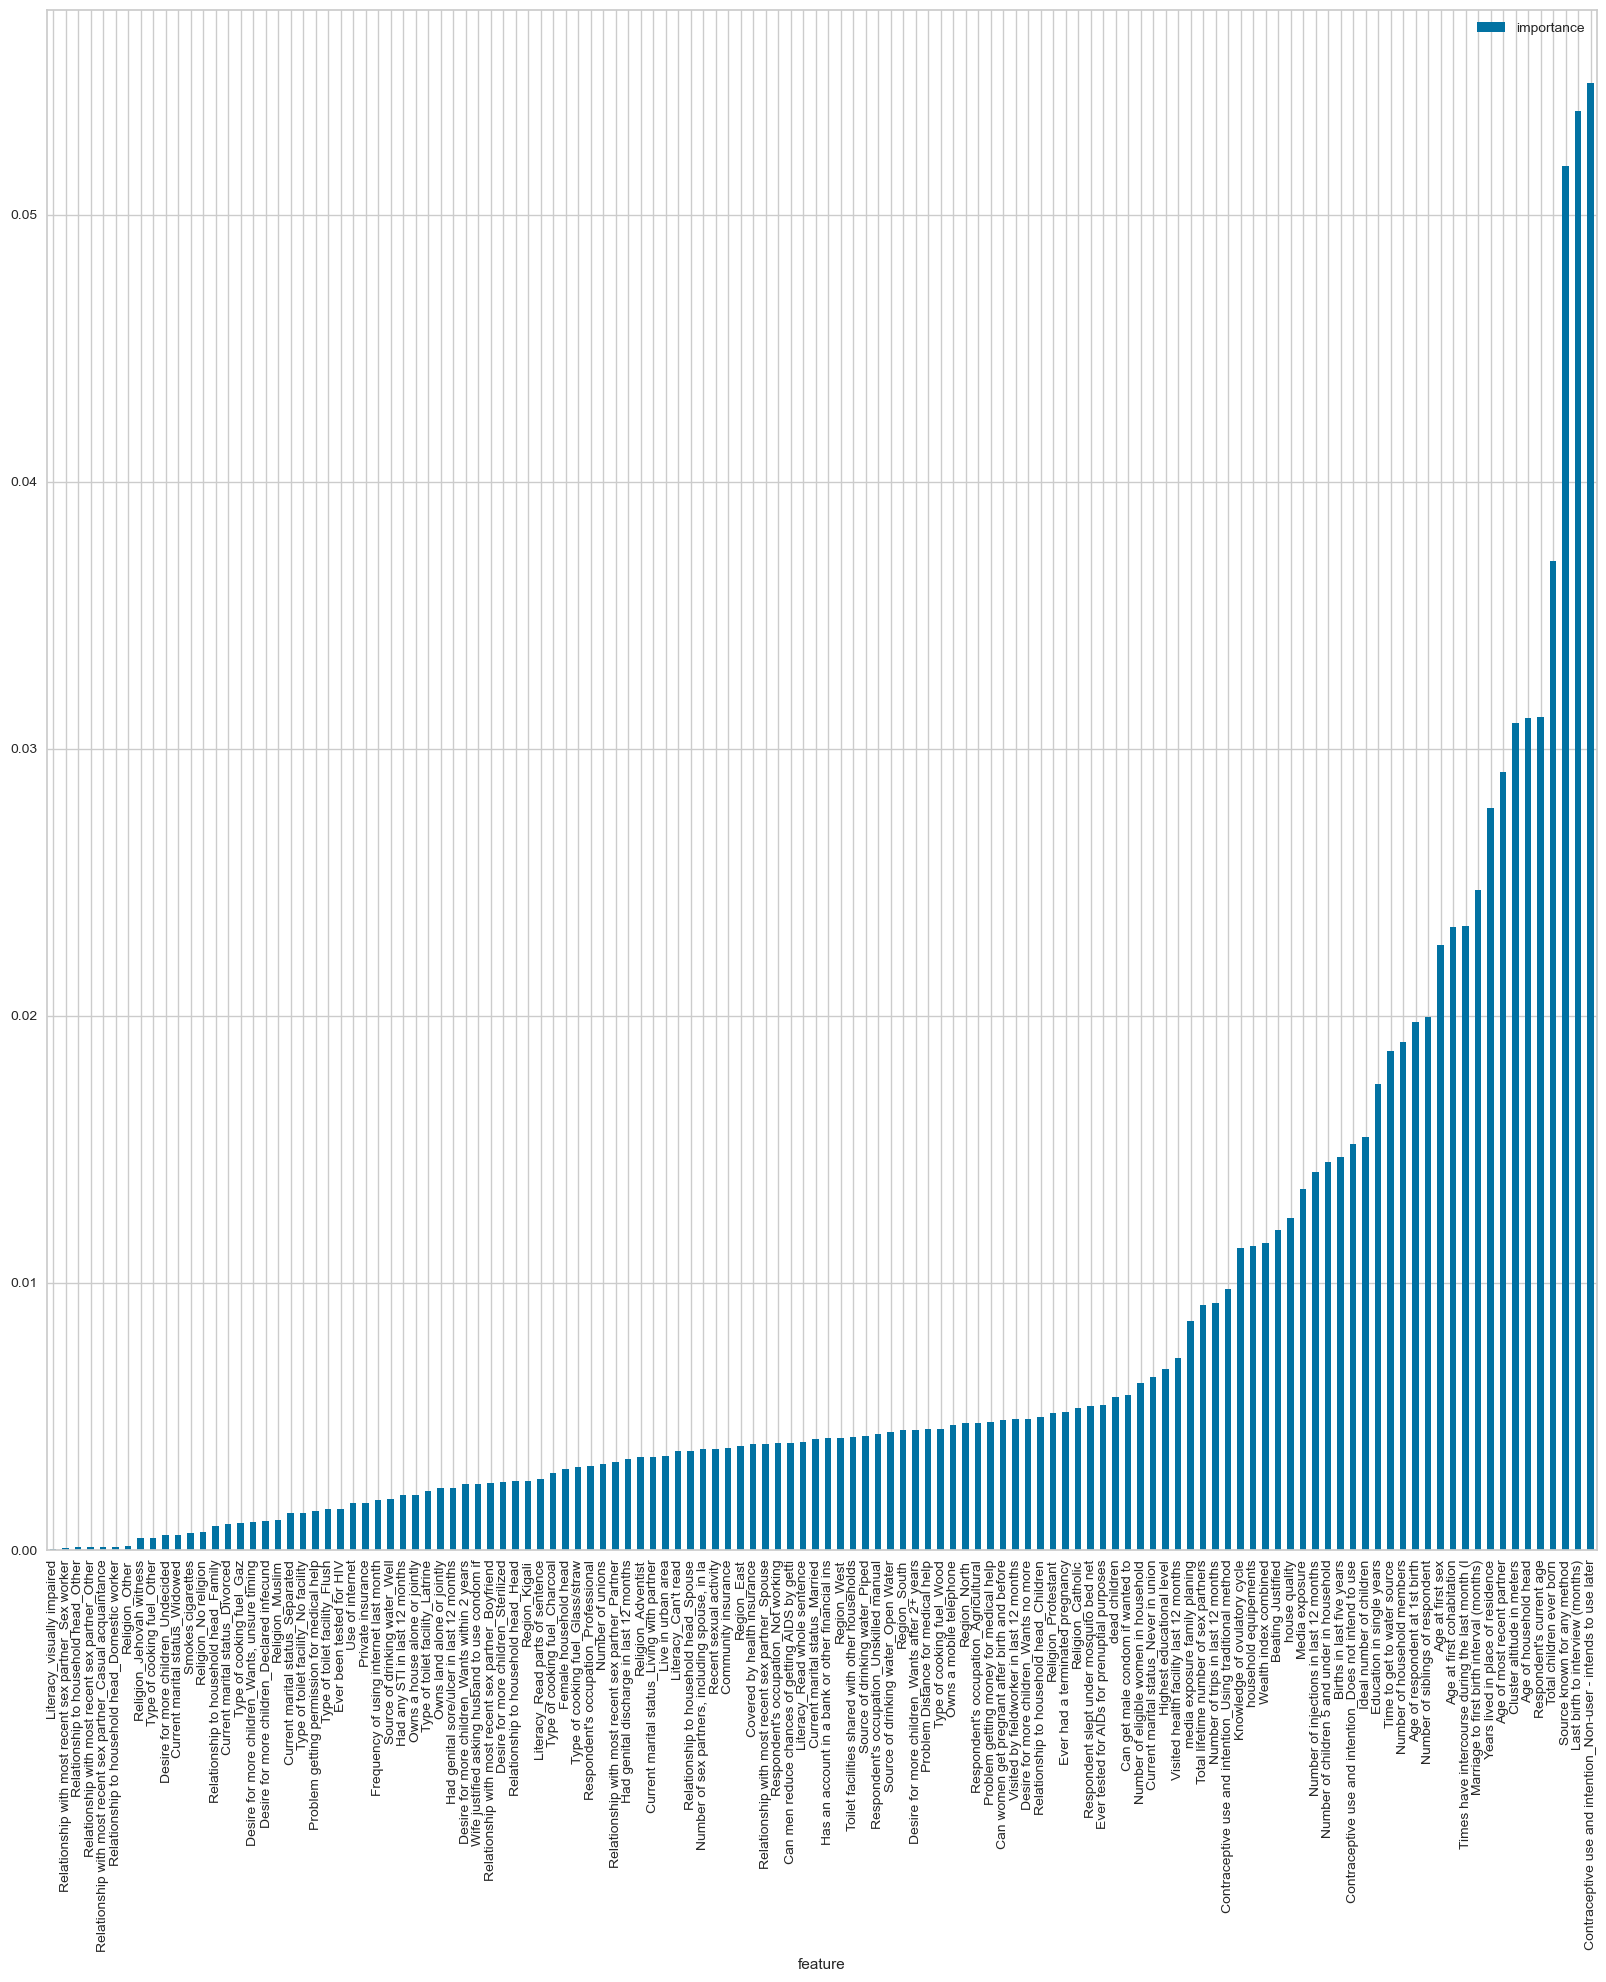

In [10]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = feature_selection_classifier.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind = 'bar', figsize=(20,20))

,Respondent's current age,Live in urban area,Cluster altitude in meters,Years lived in place of residence,Highest educational level,Time to get to water source,Education in single years,Number of household members,Number of children 5 and under in household,Number of eligible women in household,Female household head,Age of household head,Toilet facilities shared with other households,Number of trips in last 12 months,Owns a mobile telephone,Has an account in a bank or other financial ins,Use of internet,Frequency of using internet last month,Wealth index combined,Total children ever born,Births in last five years,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Marriage to first birth interval (months),Last birth to interview (months),Ever had a terminated pregnancy,Can women get pregnant after birth and before,Source known for any method,Visited by fieldworker in last 12 months,Visited health facility last 12 months,Respondent slept under mosquito bed net,Smokes cigarettes,Problem getting permission for medical help,Problem getting money for medical help,Problem Distance for medical help,Number of injections in last 12 months,Covered by health insurance,Community insurance,Number of unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Ideal number of children,Owns a house alone or jointly,Owns land alone or jointly,Had any STI in last 12 months,Had genital sore/ulcer in last 12 months,Had genital discharge in last 12 months,"Number of sex partners, including spouse, in la",Ever been tested for HIV,Wife justified asking husband to use condom if,Age of most recent partner,Total lifetime number of sex partners,Number of siblings of respondent,Times have intercourse during the last month (l,Can get male condom if wanted to,Can men reduce chances of getting AIDS by getti,Ever tested for AIDs for prenuptial purposes,media exposure family planing,household equipements,dead children,Private insurance,Beating Justified,house quality,Media exposure,Region_East,Region_Kigali,Region_North,Region_South,Region_West,Source of drinking water_Open Water,Source of drinking water_Piped,Source of drinking water_Well,Type of toilet facility_Flush,Type of toilet facility_Latrine,Type of toilet facility_No facility,Religion_Adventist,Religion_Catholic,Religion_Jehovah witness,Religion_Muslim,Religion_No religion,Religion_Other,Religion_Protestant,Relationship to household head_Children,Relationship to household head_Domestic worker,Relationship to household head_Family,Relationship to household head_Head,Relationship to household head_Other,Relationship to household head_Spouse,Literacy_Can't read,Literacy_Read parts of sentence,Literacy_Read whole sentence,Literacy_visually impaired,Type of cooking fuel_Charcoal,Type of cooking fuel_Gaz,Type of cooking fuel_Glass/straw,Type of cooking fuel_Other,Type of cooking fuel_Wood,Contraceptive use and intention_Does not intend to use,Contraceptive use and intention_Non-user - intends to use later,Contraceptive use and intention_Using traditional method,Current marital status_Divorced,Current marital status_Living with partner,Current marital status_Married,Current marital status_Never in union,Current marital status_Separated,Current marital status_Widowed,Desire for more children_Declared infecund,Desire for more children_Sterilized,Desire for more children_Undecided,Desire for more children_Wants after 2+ years,Desire for more children_Wants no more,Desire for more children_Wants within 2 years,"Desire for more children_Wants, unsure timing",Respondent's occupation_Agricultural,Respondent's occupation_Not working,Respondent's occupation_Professional,Respondent's occupation_Unskilled manual,Relationship with most recent sex partner_Boyfriend,Relationship with most recent sex partner_Casual acquaintance,Relationship with most recent sex partner_Other,Relationship with most recent sex partner_Partner,Relationship with most recent sex partner_Sex worker,Relationship with most r

# Plotting Features with Accuracy Score

In [72]:
rangge = [n for n in range(1,50) if n%5 ==0]
scores_fs = []
number_fs = []
for num in rangge:
    feature_selection_classifier = RandomForestClassifier(random_state=42)
    feature_selection_classifier.fit(X_train[features.index[0:num]], y_train)
    score = feature_selection_classifier.score(X_test[features.index[0:num]], y_test)
    number_fs.append(num)
    scores_fs.append(score)

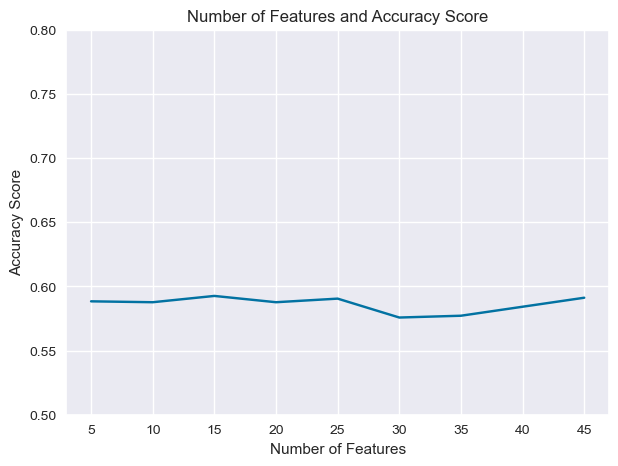

In [74]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(7, 5))    
palette = sns.color_palette("bright", 6)
sns.lineplot(x=number_fs, y=scores_fs)
plt.ylim(0.5,0.8)
ax.set_title('Number of Features and Accuracy Score')
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy Score')
plt.savefig('features_accuracy.png', dpi=300)

# Model Selection
- we selected featuresusing threashold of 0.008 of feature importance. In total we selected 33 features

In [75]:
model = SelectFromModel(classifier, prefit=True,threshold = .008)
train_reduced = model.transform(X_train)
test_reduced = model.transform(X_test)
print(train_reduced.shape)

(5702, 33)


# Model Selection with 10 Folds Cross Validation"

In [76]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [95]:
models = {"Logistic Regression": LogisticRegression(random_state=42),
          "DTC": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42), 
          'AdaBoost': AdaBoostClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42),
           "SVM": SVC(random_state=42),
          "MLP": MLPClassifier(random_state=42)}

In [129]:
scores_list = []

for key, value in models.items():
    model = value
    accuracy = cross_val_score(model, train_reduced, y_train, scoring= 'accuracy',
                         cv=cv, n_jobs=-1)
    
    f1 = cross_val_score(model, train_reduced, y_train, scoring= 'f1',
                         cv=cv, n_jobs=-1)
    
    precision = cross_val_score(model, train_reduced, y_train, scoring= 'precision',
                         cv=cv, n_jobs=-1)
    
    recall = cross_val_score(model, train_reduced, y_train, scoring= 'recall',
                         cv=cv, n_jobs=-1)
    
    roc_auc = cross_val_score(model, train_reduced, y_train, scoring= 'roc_auc',
                         cv=cv, n_jobs=-1)
    
    scores_list.append([key, np.mean(accuracy), np.mean(f1), np.mean(precision), np.mean(recall), np.mean(roc_auc)])
    
    

In [130]:
model_selection = pd.DataFrame(scores_list, columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC'])
model_selection

,Model,Accuracy Score,F1 Score,Precision,Recall,ROC-AUC
0,Logistic Regression,0.711506,0.755115,0.745983,0.764958,0.781002
1,DTC,0.656089,0.705732,0.702628,0.710242,0.645984
2,Random Forest,0.748334,0.786077,0.776182,0.797019,0.816007
3,AdaBoost,0.730978,0.773681,0.757710,0.791217,0.804331
4,Gradient Boosting,0.747984,0.787959,0.770857,0.806345,0.820448
5,SVM,0.733953,0.776170,0.759275,0.794435,0.792534
6,MLP,0.726409,0.770379,0.752447,0.790804,0.802735


In [132]:
model_selection.to_csv("Final Model Table.csv", index=False)

# Plotting Area Under the Curve of different Models

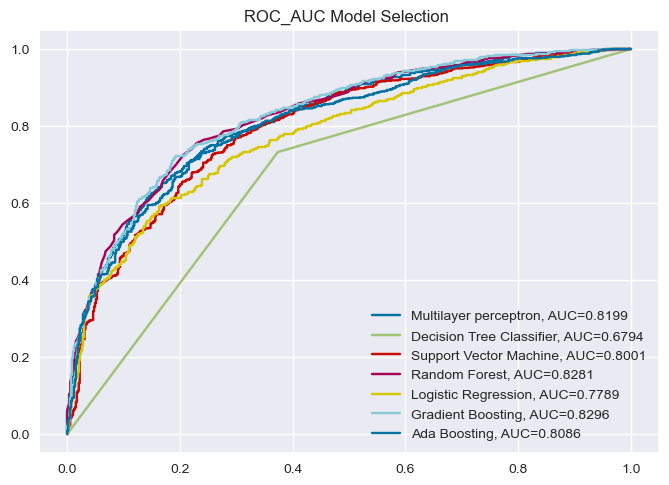

In [171]:
#set up plotting area
plt.figure(0).clf()

#fit Multilayer perceptron model and plot ROC curve
model = MLPClassifier(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multilayer perceptron, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = DecisionTreeClassifier(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


#fit Suport Vector model and plot ROC curve
model = SVC(probability=True, random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit logistic regression model and plot ROC curve
model = LogisticRegression(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = AdaBoostClassifier(random_state=42)
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Ada Boosting, AUC="+str(auc))

#add legend
plt.legend()
plt.title('ROC_AUC Model Selection ')
plt.savefig('AUC ROC final.png', dpi=300)

# Hyper parameter Tuning random forest

In [104]:
classifier_rf = RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)

In [105]:
classifier_rf.fit(train_reduced, y_train)

RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)

In [115]:
classifier_rf.score(test_reduced, y_test)

0.7650771388499299

In [133]:
# grid_search.fit(train_reduced, y_train)
# grid_search

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [119]:
# Final RF Model

In [161]:
classifier_rf = RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)
classifier_rf.fit(train_reduced, y_train)

RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)

In [162]:
classifier_rf.score(test_reduced, y_test)

0.7650771388499299

# hyperparameter tuning for xg boosting classifier

In [134]:
model_gbc = GradientBoostingClassifier(n_estimators = 10, random_state=10)
model_gbc.fit(train_reduced,y_train)


GradientBoostingClassifier(n_estimators=10, random_state=10)

In [135]:
y_pred = model_gbc.predict(test_reduced)
y_pred_prob = model_gbc.predict_proba(test_reduced)[:,1]

In [136]:
#Print model report:
print("\nModel Report")
print('Accuracy: %.4g' % metrics.accuracy_score(y_test.values,y_pred))
print('AUC Score: %f' % metrics.roc_auc_score(y_test,y_pred_prob))


Model Report
Accuracy: 0.7532
AUC Score: 0.812819


In [137]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=1, cv=5)
gsearch1.fit(train_reduced,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=1, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [138]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.8178017905323911)

In [139]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=1,cv=5)
gsearch2.fit(train_reduced,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_features='sqrt',
                                                  n_estimators=50,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=1,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')

In [140]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_samples_split': 400}, 0.8184481279741901)

In [141]:
param_test3 = {'min_samples_leaf':range(30,81,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60,max_depth=5, min_samples_split=400, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=1, cv=5)
gsearch3.fit(train_reduced,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_depth=5,
                                                  max_features='sqrt',
                                                  min_samples_split=400,
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=1, param_grid={'min_samples_leaf': range(30, 81, 10)},
             scoring='roc_auc')

In [142]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40}, 0.8193561258241735)

In [143]:
param_test4 = {'max_features':range(14,27,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60,max_depth=9, min_samples_split=800, min_samples_leaf=80, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=1, cv=5)
gsearch4.fit(train_reduced,y_train)
   

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_depth=9,
                                                  min_samples_leaf=80,
                                                  min_samples_split=800,
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=1, param_grid={'max_features': range(14, 27, 2)},
             scoring='roc_auc')

In [144]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 22}, 0.8227172530734169)

In [145]:
param_test5 = {'subsample':[0.5,0.55,0.6,0.65]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60,max_depth=9,min_samples_split=800, min_samples_leaf=40, random_state=10, max_features='sqrt'),
param_grid = param_test5, scoring='roc_auc',n_jobs=1, cv=5)
gsearch5.fit(train_reduced,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.6}, 0.8162649134317161)

# Best GB Classifier

In [163]:
clf2 = GradientBoostingClassifier(min_samples_leaf=40, learning_rate=0.15, n_estimators=100,max_depth=5, min_samples_split=400, max_features=22, subsample=0.65, random_state=10) 

In [164]:
clf2.fit(train_reduced, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=5, max_features=22,
                           min_samples_leaf=40, min_samples_split=400,
                           random_state=10, subsample=0.65)

In [165]:
predicted2 = clf2.predict(test_reduced)

In [166]:
accuracy_score(y_test, predicted2)

0.7503506311360448

# Comparing 2 models after tuning

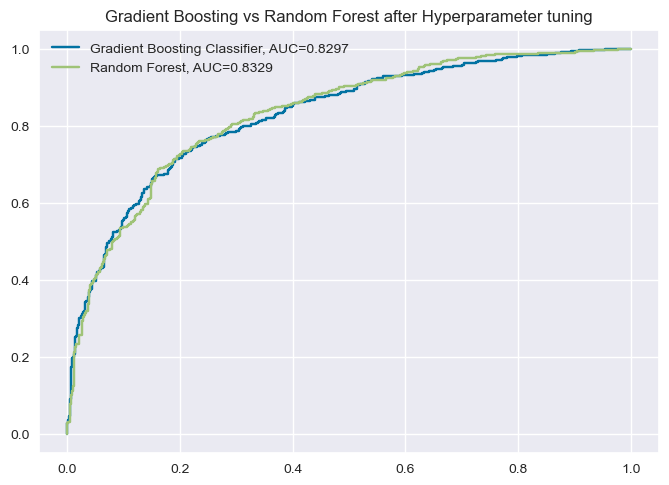

In [173]:
#fit Gradient Boosting model and plot ROC curve
model = clf2
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting Classifier, AUC="+str(auc))

#fit Multilayer perceptron model and plot ROC curve
model = classifier_rf
model.fit(train_reduced, y_train)
y_pred = model.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

plt.title('Gradient Boosting vs Random Forest after Hyperparameter tuning')
plt.legend()
plt.savefig('GB vs RF ROC_AUC.png', dpi=300);

In [176]:
models_final = {"Random Forest":classifier_rf, "Gradient Boosting": clf2}

In [179]:
scores_list = []

for key, value in models_final.items():
    model = value
    model.fit(train_reduced,y_train)
    y_pred = model.predict_proba(test_reduced)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    predicted = model.predict(test_reduced)
    accuracy = accuracy_score(y_test, predicted)
    
    
    scores_list.append([key, accuracy, auc])   

In [185]:
model_after_tuning = pd.DataFrame(scores_list, columns = ['Model','Accuracy Score', 'ROC_AUC'])
model_after_tuning

,Model,Accuracy Score,ROC_AUC
0,Random Forest,0.765077,0.8329
1,Gradient Boosting,0.750351,0.8297


In [186]:
model_after_tuning.to_csv('Model After Tuning.csv', index=False)

# Final Model

In [187]:
classifier_rf = RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)

In [188]:
classifier_rf.fit(train_reduced, y_train)

RandomForestClassifier(max_depth=40, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=127, n_jobs=-1,
                       random_state=42)

# Model Evaluation

In [189]:
predicted = classifier_rf.predict(test_reduced)

In [190]:
#Accuracy Score
accuracy_score(y_test, predicted)

0.7650771388499299

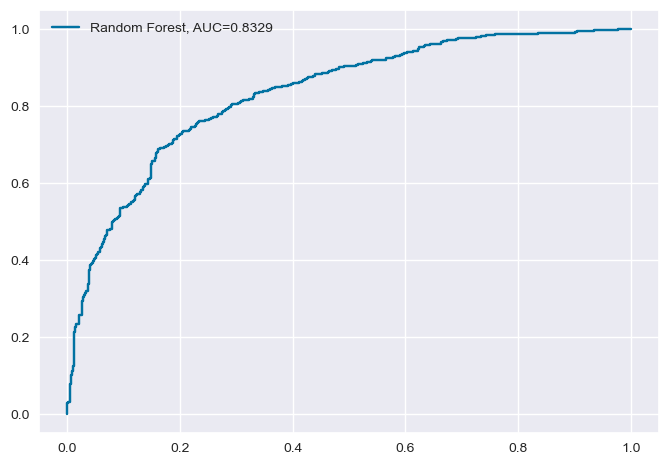

In [193]:
predicted_prob = classifier_rf.predict_proba(test_reduced)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob)
auc = round(metrics.roc_auc_score(y_test, predicted_prob), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
#add legend
plt.legend()

# Confusion Matrix

In [194]:
confusion_matrix(y_test,predicted)

array([[392, 197],
       [138, 699]], dtype=int64)

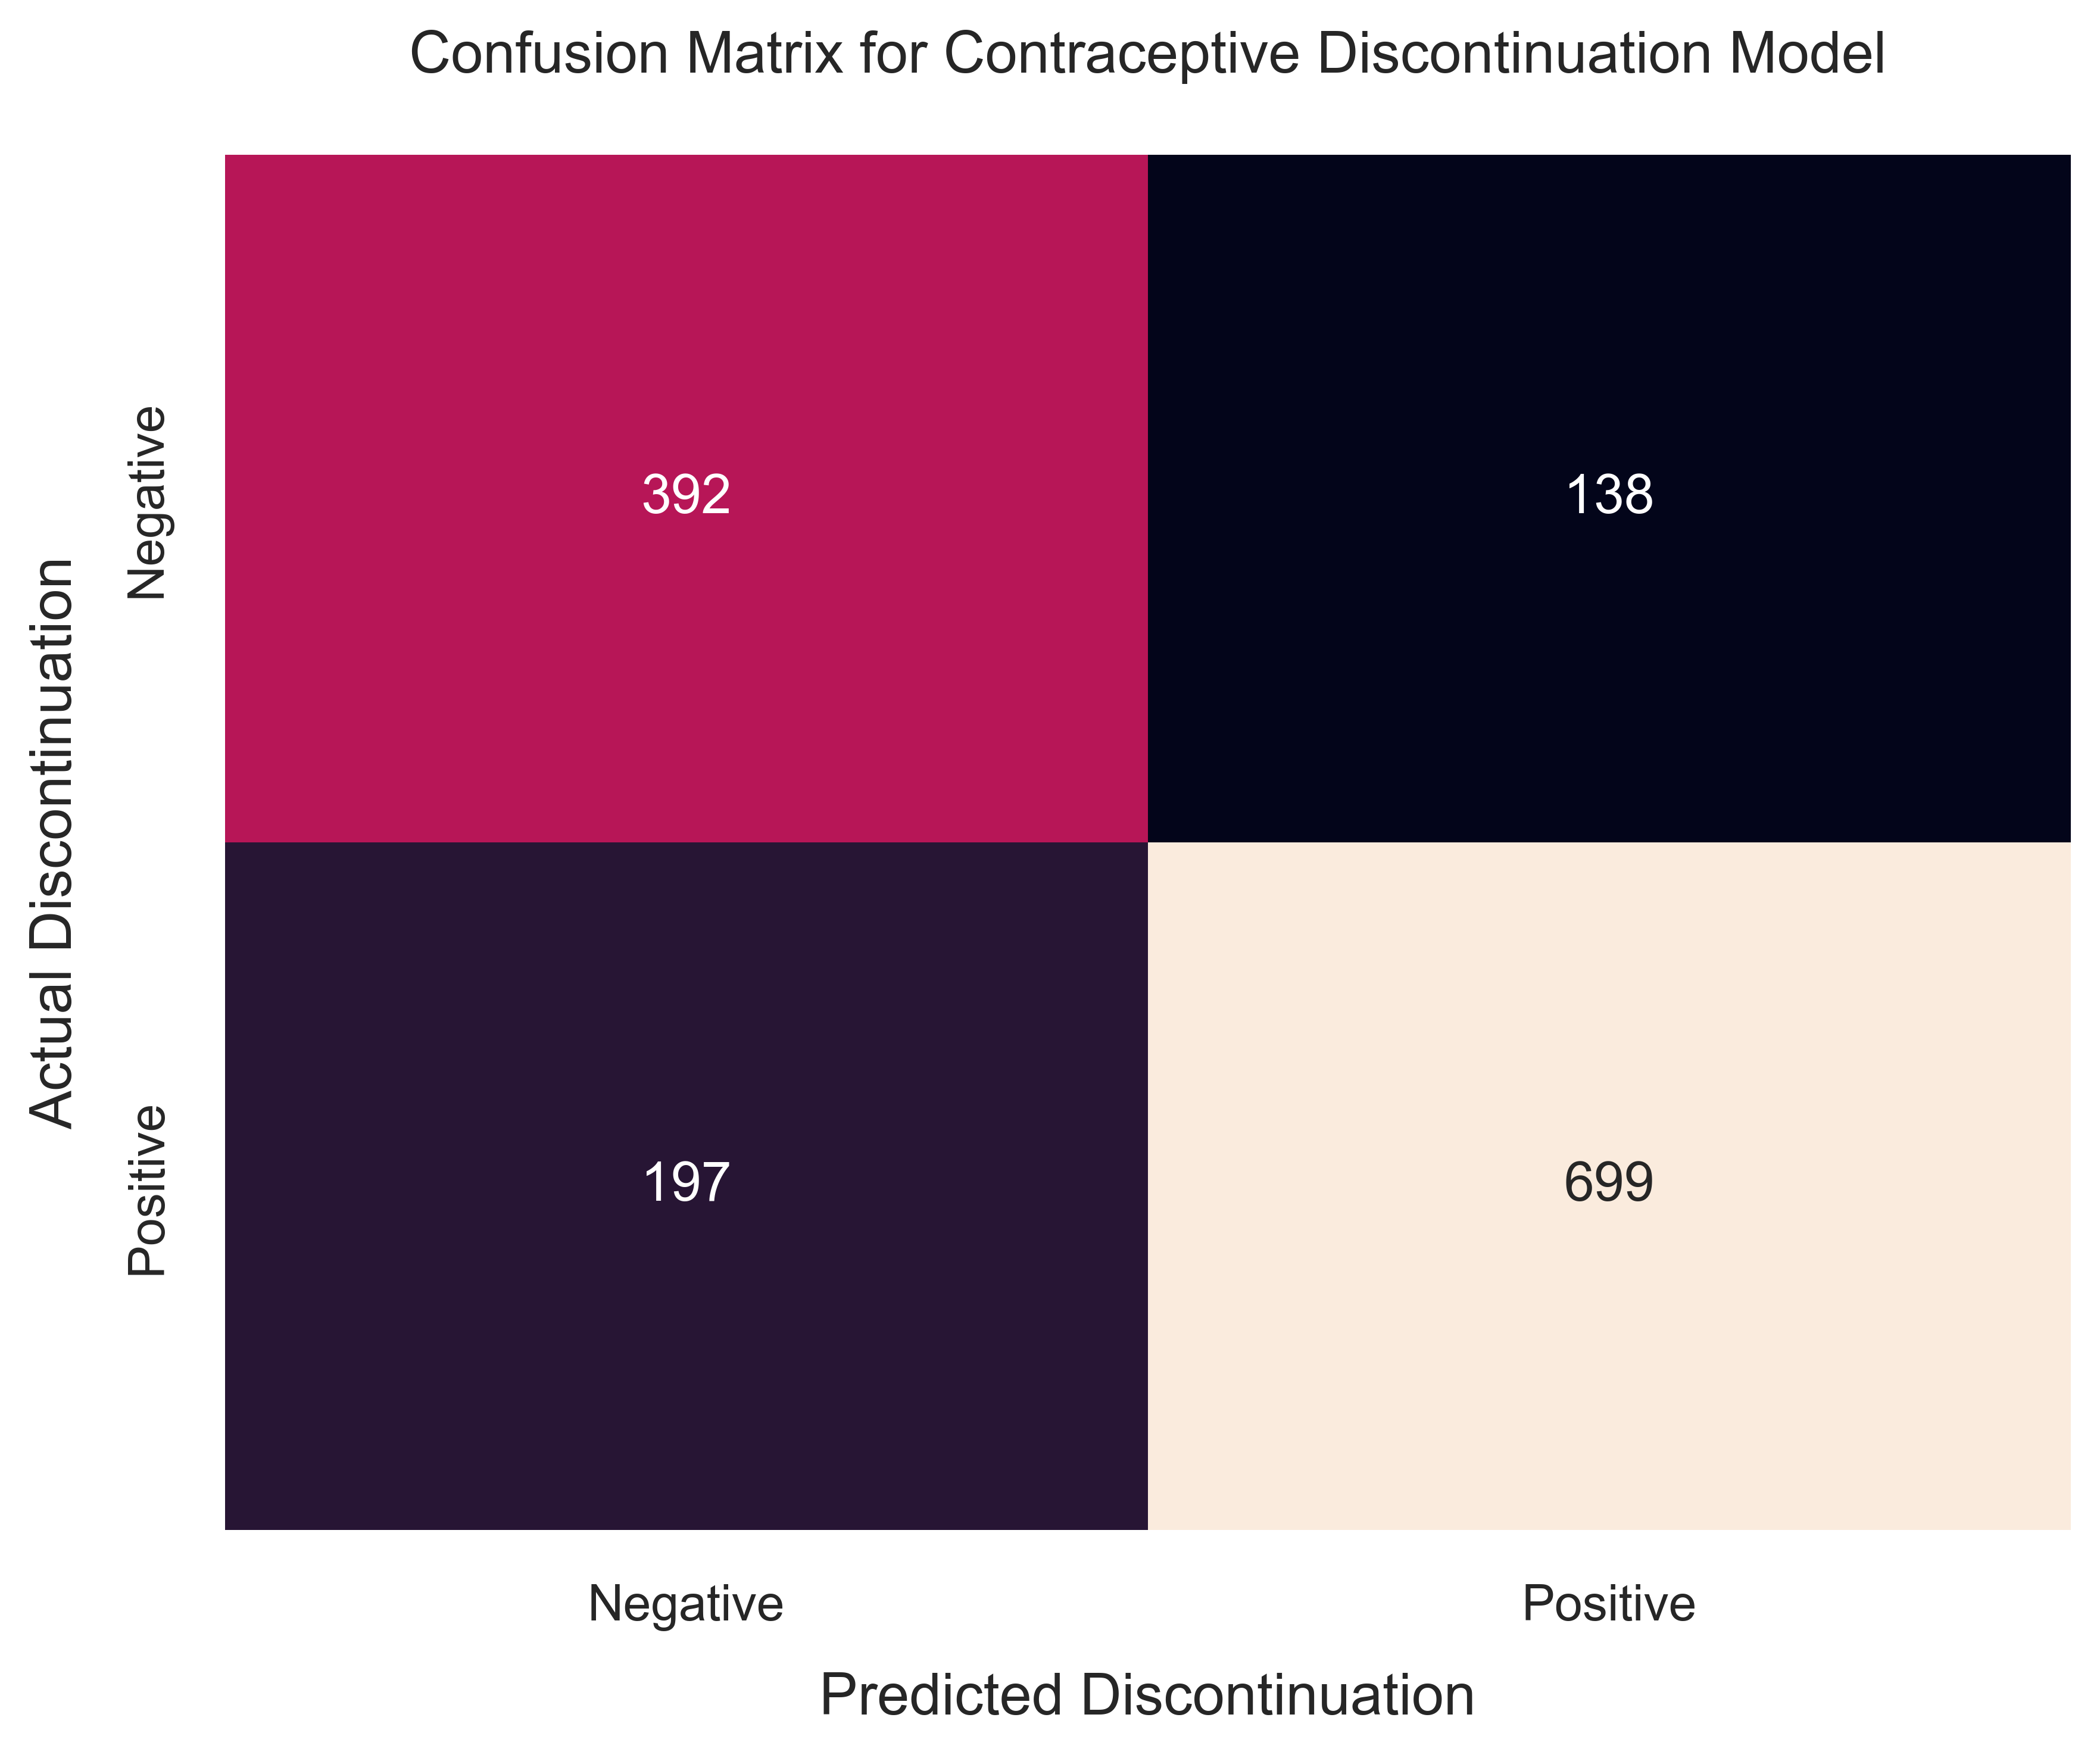

In [209]:
plt.figure(figsize=(8,6), dpi=500)

sns.set(font_scale = 1.1)

ax = sns.heatmap(confusion_matrix(predicted, y_test), annot=True,fmt="d", cbar=False)

ax.set_xlabel("Predicted Discontinuation", fontsize=14, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Discontinuation", fontsize=14, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for Contraceptive Discontinuation Model", fontsize=14, pad=20)
fig.tight_layout()
plt.savefig('confusion matrix.png', bbox_inches="tight")
plt.show();

# Classification Report

In [196]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70       589
         1.0       0.78      0.84      0.81       837

    accuracy                           0.77      1426
   macro avg       0.76      0.75      0.75      1426
weighted avg       0.76      0.77      0.76      1426



In [197]:
from yellowbrick.classifier import ClassificationReport

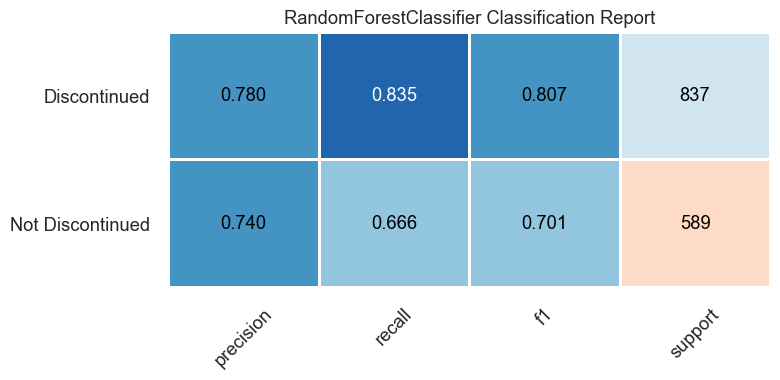

In [198]:
viz = ClassificationReport(classifier_rf,
                           classes=['Not Discontinued', 'Discontinued'],
                           support=True,
                           fig=plt.figure(figsize=(8,4)), colorbar=False, cmap='')


viz.fit(train_reduced, y_train)

viz.score(test_reduced, y_test)

viz.show(outpath="classification report.png");